In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [48]:
df = pd.read_csv('balance.csv',names = ['Class Name','Left-Weight','Left-Distance','Right-Weight','Right-Distance'])

In [49]:
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [50]:
df.shape

(625, 5)

In [51]:
print(df.describe())

       Left-Weight  Left-Distance  Right-Weight  Right-Distance
count   625.000000     625.000000    625.000000      625.000000
mean      3.000000       3.000000      3.000000        3.000000
std       1.415346       1.415346      1.415346        1.415346
min       1.000000       1.000000      1.000000        1.000000
25%       2.000000       2.000000      2.000000        2.000000
50%       3.000000       3.000000      3.000000        3.000000
75%       4.000000       4.000000      4.000000        4.000000
max       5.000000       5.000000      5.000000        5.000000


In [52]:
print(df.groupby('Class Name').size())

Class Name
B     49
L    288
R    288
dtype: int64


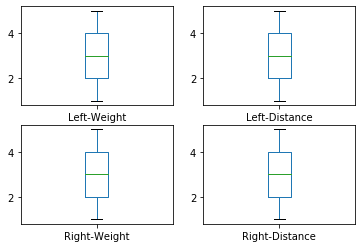

In [53]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

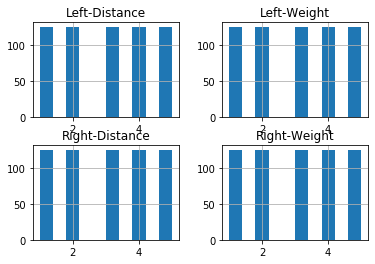

In [54]:
df.hist()
pyplot.show()

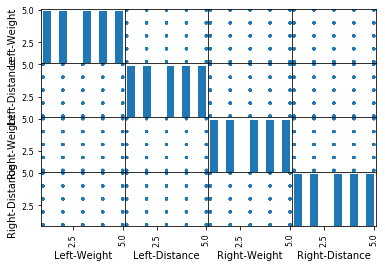

In [55]:
scatter_matrix(df)
pyplot.show()

In [56]:
df.isnull().sum()

Class Name        0
Left-Weight       0
Left-Distance     0
Right-Weight      0
Right-Distance    0
dtype: int64

In [57]:
dfcor = df.corr()
dfcor

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
Left-Weight,1.0,0.0,0.0,0.0
Left-Distance,0.0,1.0,0.0,0.0
Right-Weight,0.0,0.0,1.0,0.0
Right-Distance,0.0,0.0,0.0,1.0


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
df['Class Name'] = le.fit_transform(df['Class Name'])

In [60]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[2.20523001, 1.41421356, 1.41421356, 1.41421356, 1.41421356],
       [0.98520693, 1.41421356, 1.41421356, 1.41421356, 0.70710678],
       [0.98520693, 1.41421356, 1.41421356, 1.41421356, 0.        ],
       ...,
       [0.61001154, 1.41421356, 1.41421356, 1.41421356, 0.        ],
       [0.61001154, 1.41421356, 1.41421356, 1.41421356, 0.70710678],
       [2.20523001, 1.41421356, 1.41421356, 1.41421356, 1.41421356]])

In [61]:
threshold = 3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [62]:

X = df.iloc[:,1:5]
Y = df.iloc[:,0]
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

     Left-Weight  Left-Distance  Right-Weight  Right-Distance
0              1              1             1               1
1              1              1             1               2
2              1              1             1               3
3              1              1             1               4
4              1              1             1               5
5              1              1             2               1
6              1              1             2               2
7              1              1             2               3
8              1              1             2               4
9              1              1             2               5
10             1              1             3               1
11             1              1             3               2
12             1              1             3               3
13             1              1             3               4
14             1              1             3               5
15      

In [63]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.871936 (0.031380)
LDA: 0.883976 (0.025011)
KNN: 0.831885 (0.034118)
CART: 0.766020 (0.030636)
NB: 0.905981 (0.020205)
SVM: 0.899940 (0.018276)


In [64]:
model = GaussianNB()

In [65]:
kfold = StratifiedKFold(n_splits=10, random_state=1)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

In [66]:
cv_results

array([0.92307692, 0.9       , 0.92      , 0.86      , 0.9       ,
       0.9       , 0.9       , 0.92      , 0.89795918, 0.93877551])

In [67]:
cv_results.mean()

0.9059811616954473

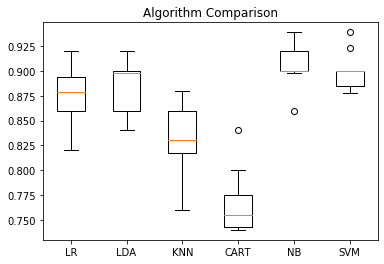

In [68]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [69]:

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [70]:
predictions

array([1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2])

In [71]:
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.872
[[ 0  5  6]
 [ 0 55  2]
 [ 0  3 54]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.96      0.92        57
           2       0.87      0.95      0.91        57

    accuracy                           0.87       125
   macro avg       0.58      0.64      0.61       125
weighted avg       0.80      0.87      0.83       125



C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
from sklearn.model_selection import cross_val_predict

k_predictions = cross_val_predict(model, X, Y, cv=10)
print(k_predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 1 1 2 2
 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 2 2 2
 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 2 2 2 1 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 1 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 2 2 1 1 1 1 2 1 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 2 1 1 1 2 2 1 1 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2
 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

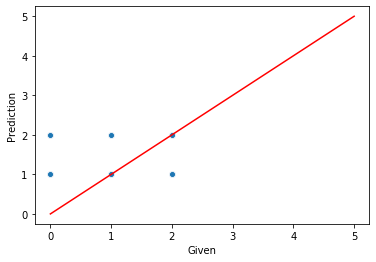

In [73]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plot_k = sns.scatterplot(Y, k_predictions)
plot_k.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [74]:
print('actual',Y_test)
print('predicted',predictions)

actual 552    1
23     2
41     2
598    0
370    1
65     2
406    1
88     2
595    1
172    2
494    0
481    1
430    1
616    1
577    1
13     2
261    2
312    0
107    2
195    1
622    1
386    2
82     2
335    1
526    1
66     2
531    1
47     2
395    2
119    2
      ..
60     0
165    0
90     0
440    1
579    1
568    2
480    1
439    2
29     2
438    0
609    1
292    2
257    2
224    2
498    0
289    2
572    0
92     2
306    1
103    1
135    2
350    1
512    2
120    0
444    2
482    1
475    1
80     1
160    1
392    2
Name: Class Name, Length: 125, dtype: int32
predicted [1 2 2 1 1 2 1 2 1 2 2 1 1 1 1 2 2 1 1 2 1 2 2 1 1 2 1 2 2 2 1 1 2 1 2 1 2
 1 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 2 1 2 2 1 1 2 1 2 2 1 1 2 1 1
 2 1 2 1 1 1 1 2 2 1 2 2 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 2 2 1 1 2 2 2 2 2
 1 2 1 1 2 1 2 2 2 1 1 1 1 2]


In [75]:
from sklearn.externals import joblib
joblib.dump(model,'Project22_Balancescale.pkl')

C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Project22_Balancescale.pkl']